In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas_visual_analysis import VisualAnalysis
import matplotlib.pyplot as plt
import json
from collections import OrderedDict
from datetime import date
import time
import seaborn as sb

In [2]:
data = pd.read_csv('./csv/abusingDetectionTrainDataset.csv')
data.shape

(104399, 44)

In [3]:
data

,newID,char_jobcode,char_level,logging_timestamp,charStatA,charStatB,charStatC,charStatD,charStatE,charStatF,...,actionSessionAmountH,actionSessionAmountI,actionSessionAmountJ,actionSessionAmountK,actionSessionAmountL,actionSessionAmountM,actionSessionAmountN,tradeSessionAmountD,tradeSessionAmountE,blocked
0,0,0,10,2017-6-26 8:59:4.224398,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1,0,0,31,2017-6-26 9:29:6.39562,0,0,0,0,2,0,...,0,0,0,2,146,0,106,0,0,0
2,0,0,40,2017-6-26 9:59:13.175257,0,0,0,0,2,0,...,0,0,0,2,229,0,172,0,0,0
3,0,0,61,2017-6-26 10:29:13.525274,0,0,0,0,6,0,...,1,2,0,2,583,0,615,0,0,0
4,0,0,61,2017-6-27 7:51:56.193386,0,0,0,0,6,0,...,0,1,0,17,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104394,14915,120,47,2017-6-19 16:47:28.622771,1,0,4563,0,4575,0,...,0,4,0,0,89,0,59,0,0,0
104395,14915,132,16,2017-6-19 12:17:5.647646,0,0,4563,0,4563,0,...,0,0,0,0,45,0,44,0,0,0
104396,14915,132,23,2017-6-19 12:47:8.165005,0,0,4563,0,4565,0,...,0,0,0,0,195,0,153,0,0,0
104397,14915,132,27,2017-6-19 13:17:9.600144,0,0,4563,0,4565,0,...,0,1,0,0,193,0,152,0,0,0


In [4]:
# 결측값 확인
data.isnull().sum()

newID                        0
char_jobcode                 0
char_level                   0
logging_timestamp            0
charStatA                    0
charStatB                    0
charStatC                    0
charStatD                    0
charStatE                    0
charStatF                    0
charStatG                    0
socialAmountA                0
socialBooleanA               0
socialBooleanB               0
socialSessionAmountA         0
activityCumulativeAmountA    0
accountMetaAmountA           0
charSessionAmountA           0
charSessionAmountB           0
charMoveSessionAmountA       0
charSessionAmountC           0
socialSessionAmountB         0
actionSessionAmountA         0
charSessionAmountD           0
activityCumulativeAmountB    0
actionSessionAmountB         0
actionSessionAmountC         0
actionSessionAmountD         0
actionSessionAmountE         0
tradeSessionAmountA          0
tradeSessionAmountB          0
tradeSessionAmountC          0
actionSe

In [5]:
data.describe()

,newID,char_jobcode,char_level,charStatA,charStatB,charStatC,charStatD,charStatE,charStatF,charStatG,...,actionSessionAmountH,actionSessionAmountI,actionSessionAmountJ,actionSessionAmountK,actionSessionAmountL,actionSessionAmountM,actionSessionAmountN,tradeSessionAmountD,tradeSessionAmountE,blocked
count,104399.000000,104399.000000,104399.000000,104399.000000,104399.000000,104399.000000,104399.000000,104399.000000,104399.000000,104399.000000,...,104399.000000,104399.000000,104399.000000,104399.000000,104399.000000,104399.000000,104399.000000,104399.000000,104399.0,104399.000000
mean,7484.512150,35.396651,48.324553,0.070815,39.750055,143.485100,0.631481,97.709269,16.134082,72.420119,...,0.026868,2.703762,0.199437,0.496624,700.909013,0.000766,1219.530082,0.054972,0.0,0.598282
std,4318.413739,21.345751,22.407708,1.017310,402.584594,1114.480669,11.328005,821.057198,264.802276,817.030460,...,0.162408,2.423407,0.880222,2.190545,962.844386,0.104952,1095.172136,0.448240,0.0,0.490248
min,0.000000,0.000000,10.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,3763.000000,29.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,222.000000,0.000000,0.0,0.000000
50%,7500.000000,30.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,202.000000,0.000000,1030.000000,0.000000,0.0,1.000000
75%,11254.000000,31.000000,61.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,1114.000000,0.000000,1971.000000,0.000000,0.0,1.000000
max,14915.000000,165.000000,159.000000,56.000000,4921.000000,11145.000000,570.000000,11402.000000,5038.000000,15302.000000,...,2.000000,11.000000,179.000000,172.000000,23333.000000,26.000000,5745.000000,39.000000,0.0,1.000000


In [6]:
# 컬럼 제거 - 누적 카운트 데이터가 없음
# socialBooleanB      : 타 캐릭터와의 인터랙션 정보
# accountMetaAmountA  : 캐릭터가 속한 메타 정보
# charSessionAmountB  : 캐릭터의 메타정보로서 세션동안 발생시킨 양
# tradeSessionAmountC : 캐릭터가 세션 중 발생시킨 거래의 양
# tradeSessionAmountE : 캐릭터가 세션 중 발생시킨 거래의 양

data = data.drop(['socialBooleanB', 'accountMetaAmountA', 'charSessionAmountB', 'tradeSessionAmountC', 'tradeSessionAmountE'], axis=1)


In [7]:
data.shape

(104399, 39)

In [8]:
# 컬럼 제거 - 일단은 시간 제거
# logging_timestamp : 해당 스냅샷 로그가 찍힌 시점


data = data.drop(['logging_timestamp'], axis=1)

In [9]:
data.shape

(104399, 38)

In [10]:
data

,newID,char_jobcode,char_level,charStatA,charStatB,charStatC,charStatD,charStatE,charStatF,charStatG,...,actionSessionAmountG,actionSessionAmountH,actionSessionAmountI,actionSessionAmountJ,actionSessionAmountK,actionSessionAmountL,actionSessionAmountM,actionSessionAmountN,tradeSessionAmountD,blocked
0,0,0,10,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1,0,0,31,0,0,0,0,2,0,0,...,0,0,0,0,2,146,0,106,0,0
2,0,0,40,0,0,0,0,2,0,0,...,0,0,0,0,2,229,0,172,0,0
3,0,0,61,0,0,0,0,6,0,0,...,1,1,2,0,2,583,0,615,0,0
4,0,0,61,0,0,0,0,6,0,0,...,0,0,1,0,17,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104394,14915,120,47,1,0,4563,0,4575,0,1,...,1,0,4,0,0,89,0,59,0,0
104395,14915,132,16,0,0,4563,0,4563,0,0,...,0,0,0,0,0,45,0,44,0,0
104396,14915,132,23,0,0,4563,0,4565,0,0,...,0,0,0,0,0,195,0,153,0,0
104397,14915,132,27,0,0,4563,0,4565,0,0,...,0,0,1,0,0,193,0,152,0,0


# 피어슨 상관분석

In [11]:
df = data.corr(method = 'pearson')
df

,newID,char_jobcode,char_level,charStatA,charStatB,charStatC,charStatD,charStatE,charStatF,charStatG,...,actionSessionAmountG,actionSessionAmountH,actionSessionAmountI,actionSessionAmountJ,actionSessionAmountK,actionSessionAmountL,actionSessionAmountM,actionSessionAmountN,tradeSessionAmountD,blocked
newID,1.000000,0.260513,0.066945,-0.006315,0.133146,0.066509,-0.016560,0.026053,0.097498,0.035204,...,-0.042766,-0.017312,0.051578,0.021453,-0.043090,-0.071394,-0.011001,0.093692,0.022186,0.047186
char_jobcode,0.260513,1.000000,0.136242,0.125766,0.151243,0.200067,0.079333,0.101979,0.241710,0.107405,...,0.319223,0.209872,-0.113993,-0.027613,0.163851,-0.093711,0.000570,-0.213513,0.119766,-0.322364
char_level,0.066945,0.136242,1.000000,0.052996,-0.020107,-0.034116,0.021732,-0.042511,-0.010033,-0.017422,...,0.105692,0.102951,0.416229,0.139420,0.041227,0.334021,-0.001022,0.468275,-0.063588,0.107759
charStatA,-0.006315,0.125766,0.052996,1.000000,0.053017,0.005506,0.047827,0.024867,0.001843,0.185913,...,0.052529,0.029821,-0.052580,-0.013215,0.045573,-0.036290,-0.000149,-0.068917,0.046037,-0.087947
charStatB,0.133146,0.151243,-0.020107,0.053017,1.000000,-0.007080,0.038979,0.483304,-0.003624,-0.001494,...,0.083918,0.054191,-0.049959,-0.012466,0.061213,-0.036692,-0.000696,-0.082684,0.043423,-0.115283
charStatC,0.066509,0.200067,-0.034116,0.005506,-0.007080,1.000000,0.011151,0.083937,0.231268,0.003285,...,0.093439,0.052262,-0.084136,-0.021026,0.021616,-0.072570,-0.000613,-0.124890,0.042034,-0.157108
charStatD,-0.016560,0.079333,0.021732,0.047827,0.038979,0.011151,1.000000,0.032295,0.020060,0.013386,...,0.063380,0.057796,-0.027799,-0.008164,0.036059,-0.022539,0.000802,-0.050068,0.033535,-0.068030
charStatE,0.026053,0.101979,-0.042511,0.024867,0.483304,0.083937,0.032295,1.000000,-0.005875,-0.002003,...,0.088158,0.052460,-0.070610,-0.019152,0.043521,-0.058716,0.001626,-0.110149,0.041832,-0.142241
charStatF,0.097498,0.241710,-0.010033,0.001843,-0.003624,0.231268,0.020060,-0.005875,1.000000,-0.003585,...,0.052038,0.038896,-0.039007,-0.008672,0.018494,-0.030945,-0.000424,-0.057686,0.018209,-0.074356
charStatG,0.035204,0.107405,-0.017422,0.185913,-0.001494,0.003285,0.013386,-0.002003,-0.003585,1.000000,...,0.087178,0.042632,-0.054863,-0.013974,0.023718,-0.044747,-0.000630,-0.083053,0.083966,-0.108172


<AxesSubplot:>

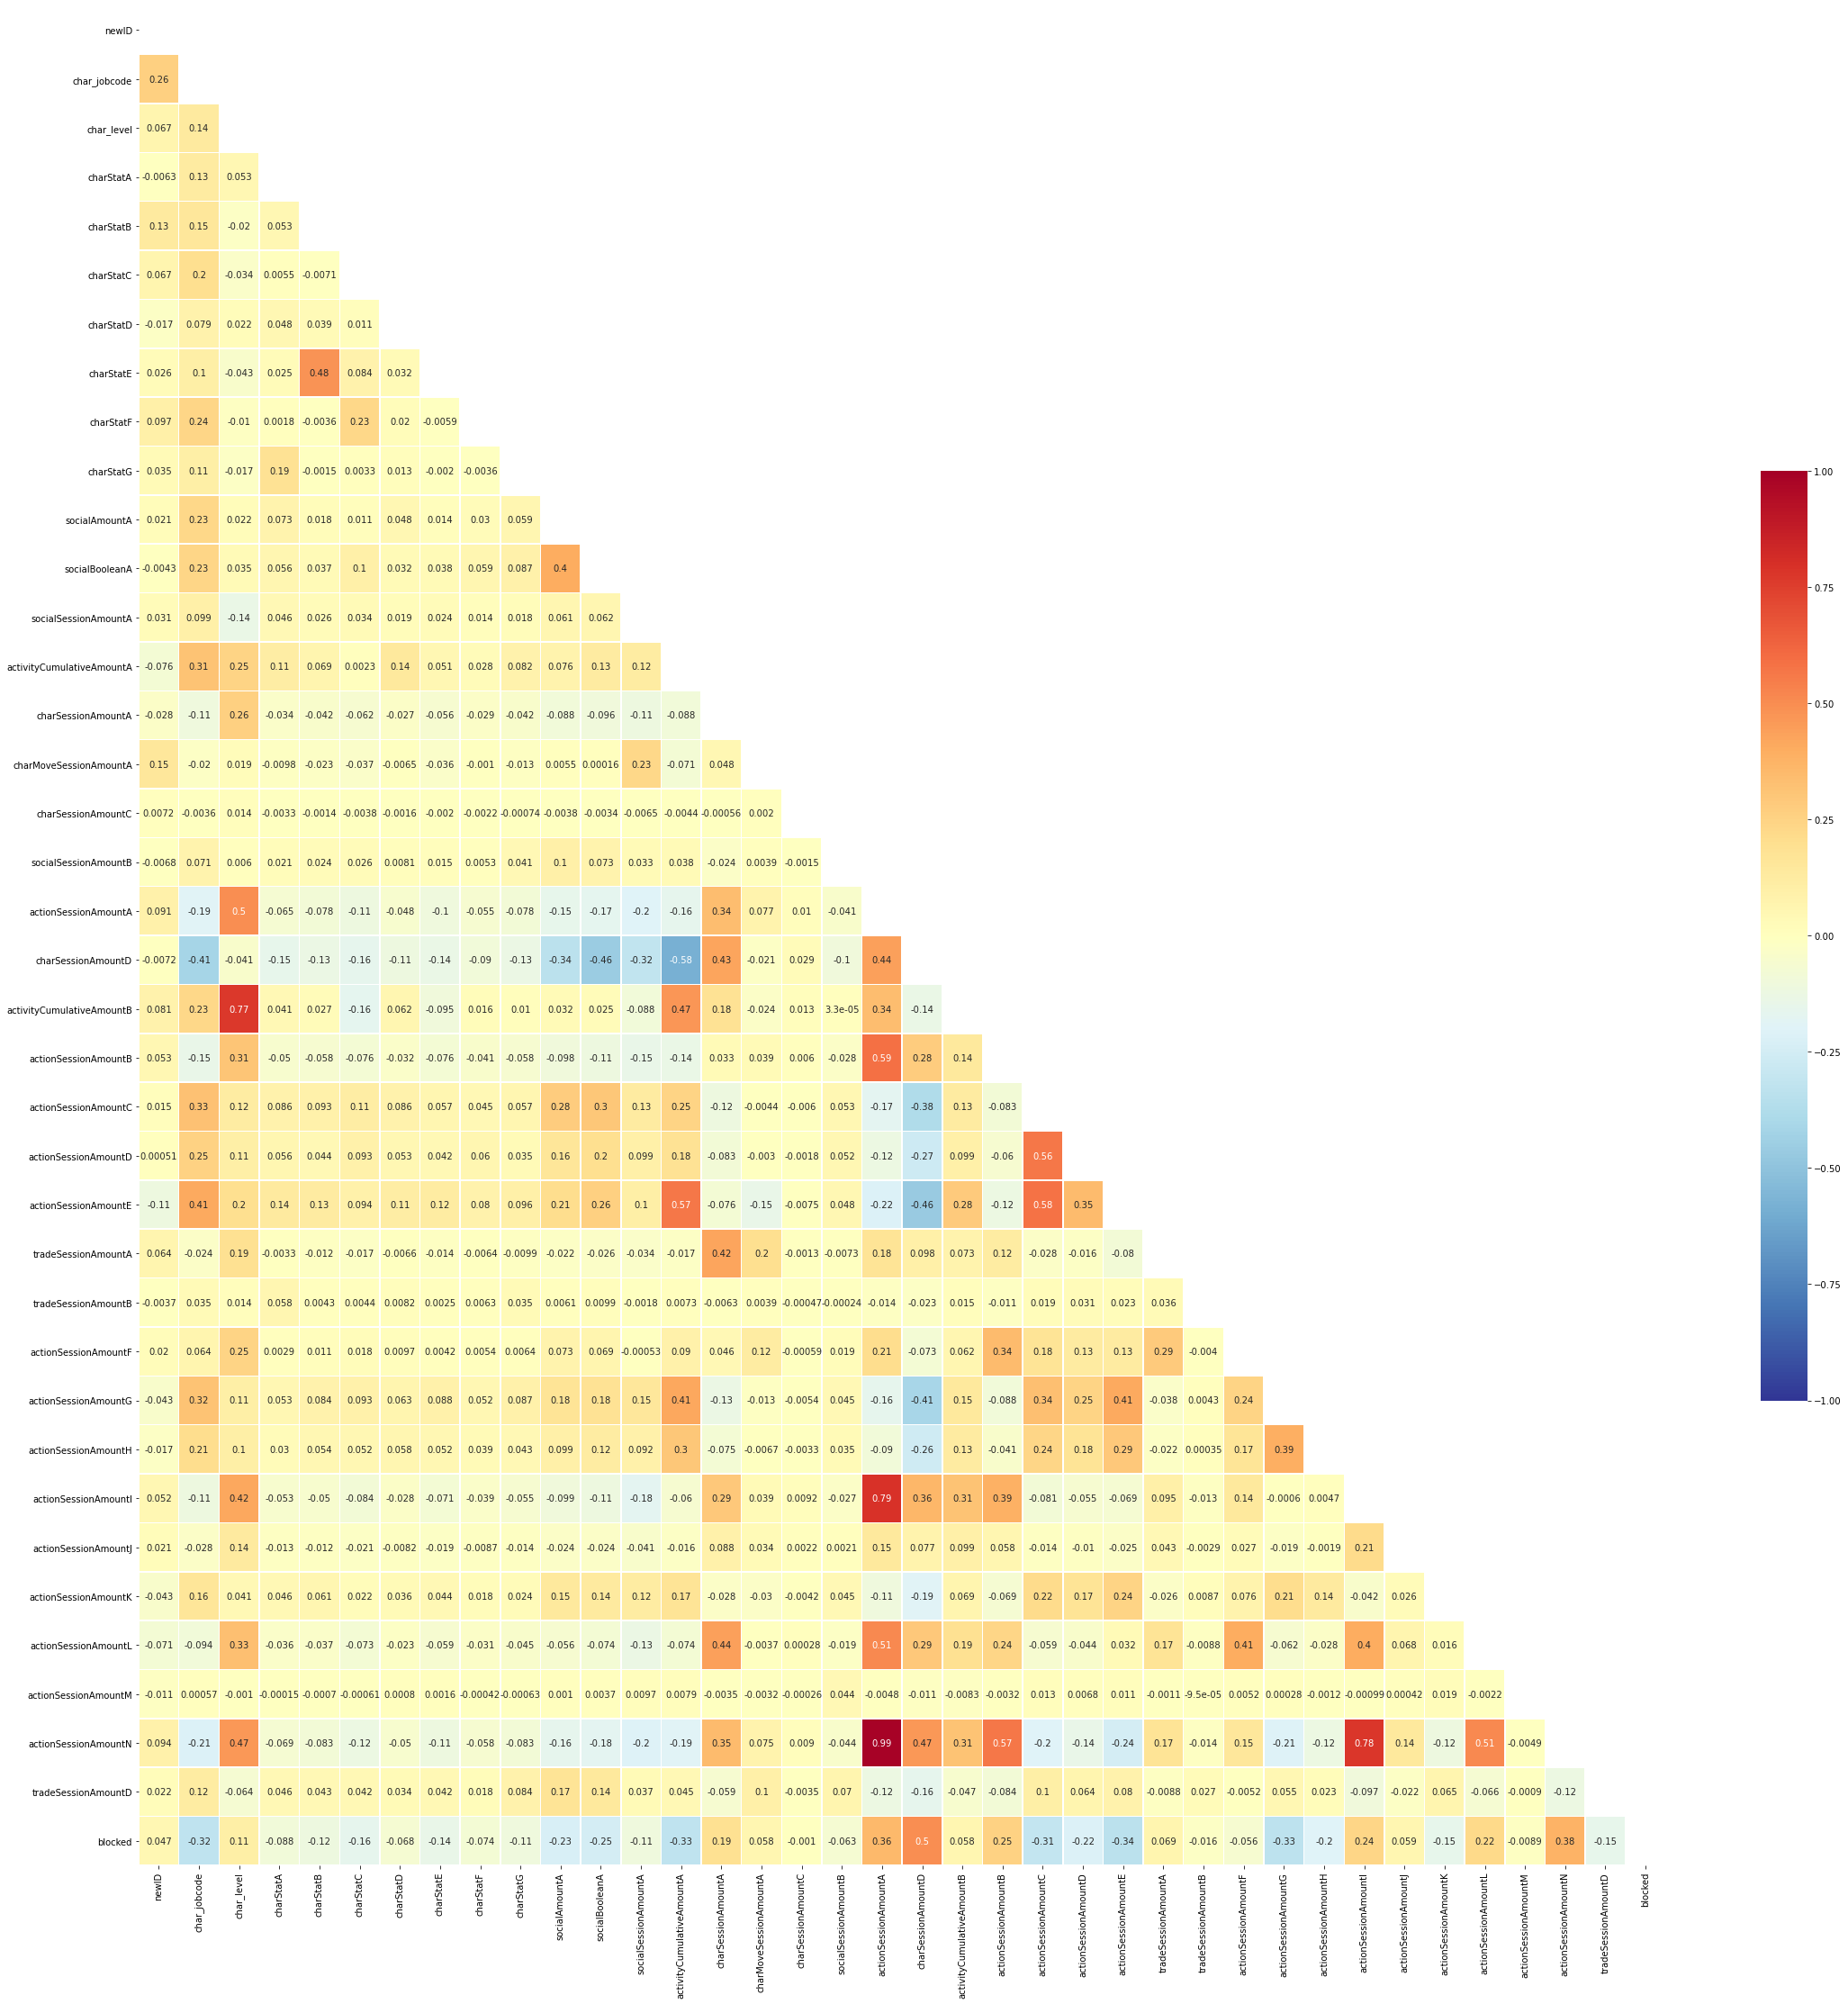

In [12]:
# heatmap으로 상관관계를 표시
plt.rcParams["figure.figsize"] = (38, 38)    # 38 rows × 38 columns

# 삼각형 마스크
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# annot : 실제 값 화면에 나타내기
# vmin  : 컬러차트 영역 -1 ~ +1
# linewidths : 경계선 실선으로 구분
# cbar_kws : 컬러바 크기 절반으로 줄이기

sb.heatmap(df, annot = True, cmap = 'RdYlBu_r', mask=mask, linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1, vmax=1)